### **Model Training**

In [64]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [13]:
# importing the dataset
data = pd.read_csv('students_data.csv')

In [14]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing the independent (X) and dependent variables (y)

In [ ]:
X = data.drop(columns='math_score', axis=1)
y = data['math_score']

In [16]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

**Splitting the data into train and test set**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
x_train.shape

(800, 7)

In [22]:
x_test.shape

(200, 7)

**Performing transformations on the input features**

In [26]:
categorical_col = X.select_dtypes(include='O').columns
numerical_col = X.select_dtypes(exclude='O').columns

preprocessor = ColumnTransformer(transformers=[
    ('OneHotEncoder', OneHotEncoder(drop='first'),categorical_col),
    ('StandardScaler', StandardScaler(), numerical_col)
], remainder='passthrough')

In [27]:
# transforming the x_train and x_test
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [30]:
x_test.shape

(200, 14)

In [33]:
# Evaluation function
def evaluation_model(true_val, pred_val):
    mae = mean_absolute_error(true_val, pred_val)
    mse = mean_squared_error(true_val, pred_val)
    rmse = np.sqrt(mean_squared_error(true_val, pred_val))
    r2_square = r2_score(true_val, pred_val)
    return mae, rmse, r2_square

In [48]:
# creating the model
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    # Making Predictions
    train_y_pred = model.predict(x_train)
    test_y_pred = model.predict(x_test)

    # Evaluating the predictions
    train_mae, train_rmse, train_r2 = evaluation_model(y_train, train_y_pred)
    test_mae, test_rmse, test_r2 = evaluation_model(y_test, test_y_pred)

    model_list.append(list(models.keys())[i])
    # Printing the Results
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5719
- Mean Absolute Error: 4.4595
- R2 Score: 0.8623
-----------------------

In [53]:
result = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model','R2 score']).sort_values(by=['R2 score'], ascending=False)
result

,Model,R2 score
2,Ridge,0.880450
0,Linear Regression,0.880433
5,Random Forest Regressor,0.851122
7,CatBoosting Regressor,0.850263
8,AdaBoost Regressor,0.848254
1,Lasso,0.825446
6,XGBRegressor,0.825046
3,K-Neighbors Regressor,0.777305
4,Decision Tree,0.742108


From the above result obtained, it is observed that Ridge and Linear Regression is showing the maximum r2 score.

**Performing Linear Regression**

In [54]:
lr_model = LinearRegression(fit_intercept=True)
lr_model = lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


**Visualization**

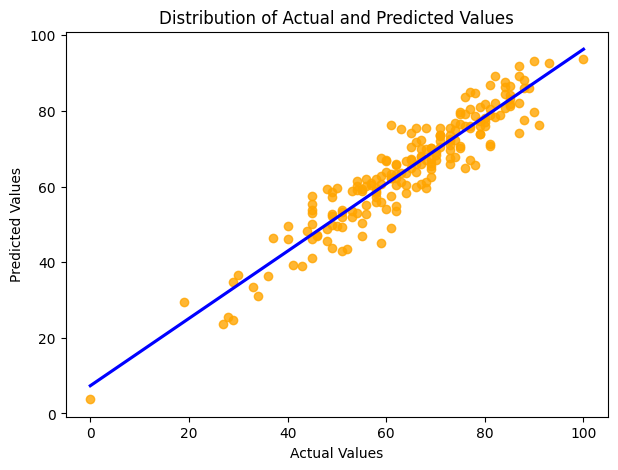

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': 'blue'},  scatter_kws={'color': 'orange'})
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()